## Import Python Libraries

Basketball is full of statistics. You'll use some of them to make decisions about the hypothetical basketball team in this module.

To make good decisions, you need good data. Throughout this module, you'll use a dataset that's based on publicly available basketball stats . You'll also use stats we created based on Tune Squad characters. All of the data is anonymized.

As fans, we can't influence the methodology for gathering data. This detail introduces some questions:

Were best practices used to gather the data?
Were biases introduced in the data?
Is there data that wasn't gathered that could influence our findings?
Because we're fans of the sport, and not necessarily the scientists who gather the data, you'll explore the data by looking for missing values, outlying values, and patterns.

Data scientists commonly find themselves in this sort of situation. Collecting data can take years. So when you're first starting out in an area, you might have to rely on previously collected data to guide initial findings. As you know from the data science lifecycle , the data science process is iterative. If you discover patterns and insights from the current data, you can perhaps influence the data that's collected in the future!

In [1]:
import pandas as pd

## Import Dataset

In [2]:
player_df = pd.read_csv("player_data.csv")

In [3]:
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


## Data Wrangling

In [6]:
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [7]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


### Drop Columns

In [8]:
player_df.dropna(axis='columns', inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [9]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   GP           39 non-null     float64
 5   MPG          40 non-null     float64
 6   TS%          45 non-null     float64
 7   AST          45 non-null     float64
 8   TO           45 non-null     float64
 9   USG          45 non-null     float64
 10  ORR          45 non-null     float64
 11  DRR          45 non-null     float64
 12  REBR         45 non-null     float64
 13  PER          36 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 5.2 KB


### Drop Rows

In [10]:
player_df.dropna(inplace=True, how='all')
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [11]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


In [12]:
player_df.dropna(inplace=True, thresh=12)
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

### Reset Data Frame Index

In [14]:
player_df.head(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


You see that the index counts 0 through 10, skipping 8. The row that had the index of 8 was dropped because it had more than two NaN values. In the 14 columns, the rows that had three or more NaN values didn't meet the threshold of 12 you set when you dropped rows earlier.

To fix this problem, reset the index for the DataFrame. This fix saves you from problems down the road when you're working with the DataFrame. While you're at it, take a look at the now smaller DataFrame.

In [15]:
player_df.reset_index(drop=True, inplace=True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   points       42 non-null     float64
 2   possessions  42 non-null     float64
 3   team_pace    42 non-null     float64
 4   GP           36 non-null     float64
 5   MPG          37 non-null     float64
 6   TS%          42 non-null     float64
 7   AST          42 non-null     float64
 8   TO           42 non-null     float64
 9   USG          42 non-null     float64
 10  ORR          42 non-null     float64
 11  DRR          42 non-null     float64
 12  REBR         42 non-null     float64
 13  PER          33 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.7 KB


In [16]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


## Data Exploration - Part 1

### Check for outliers

You still have some lingering missing values, but let's set those missing values aside for a moment. Otherwise, you might be tempted to impute replacement values, and possible outliers in the dataset might skew your replacements.

Outliers are data values so far outside the distribution of other values that they bring into question whether they even belong in the dataset. Outliers often arise from data errors or other undesirable noise. You'll always need to check for and deal with possible outliers before you analyze the data.

A quick way to identify outliers is to use the pandas describe() function:

In [17]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


Here you see, for example, that the mean for all 42 players is 1592.38 points. But look at the numbers for min (183), 25% (1390.75), 50% (1680.0), 75% (1826.25), and max (2062). Here, the min points (183) might be an outlier. You can use box plots to visualize the values and determine possible outliers.

### Create box plots for columns
The traditional tool for probing for outlying data values is the box plot. The box in box plot refers to a box drawn around the range of data from the 25th percentile to the 75th percentile. (These percentiles demarcate important quarters of the data. Their range is called the interquartile range.) This box is the middle 50% of the data values for a given variable (a column in a DataFrame). You use another line to mark the median of the data, which is the 50th percentile.

The box plot is also called a box-and-whisker plot because you draw a T shape above and below the box to encompass the maximum and minimum values of the data, excluding outliers. This last part is important for your purposes because it lets you graphically identify outliers.

Ideally, you would produce the box plots for your columns in a single matrix that you can easily scan. Unfortunately, no single function produces multiple box plots, so you'll write a for loop instead.

Because of how the Seaborn library in Python works, you need to explicitly state the cell in the matrix where you want to render each box plot. Use the Python floor-division operator (//) to divide the 13 columns of interest (you don't need to look at ID) into rows. Use the modulo operator (%) to derive the column.

First, import the Matplotlib and Seaborn libraries into your notebook:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

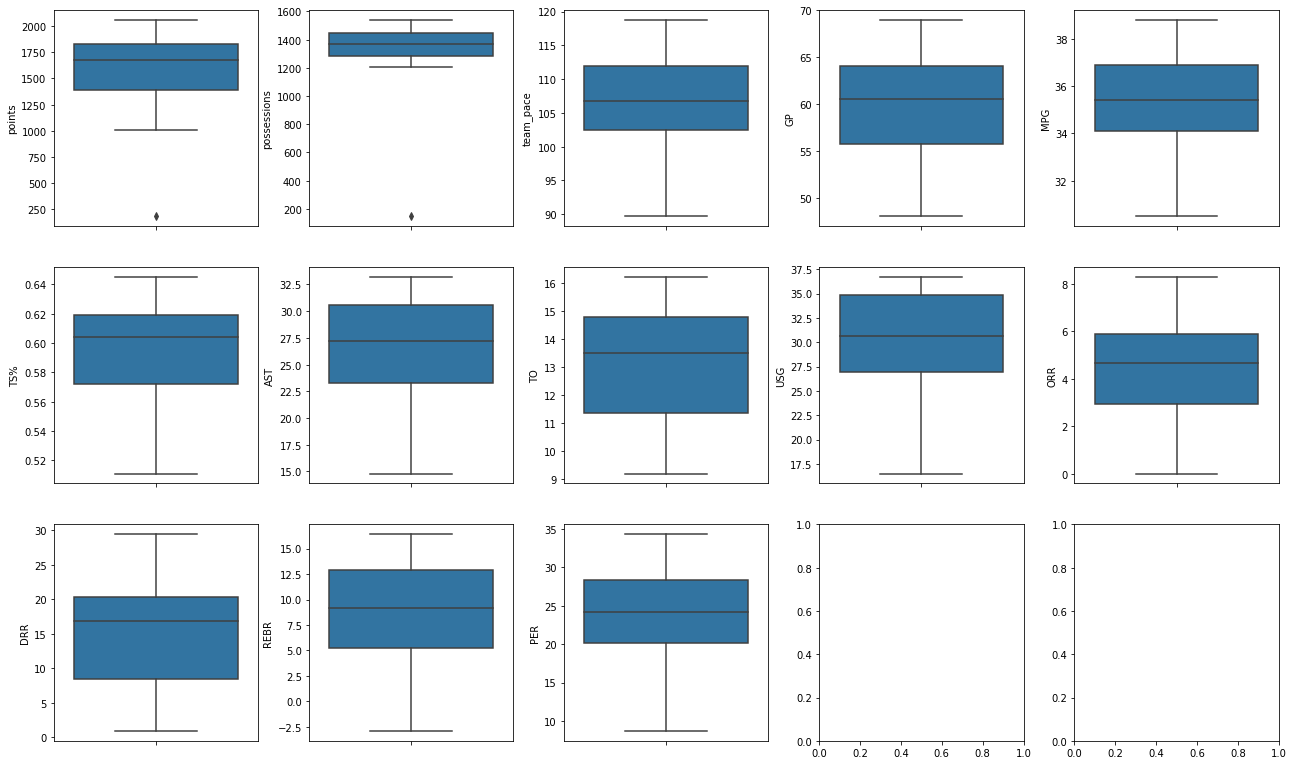

In [23]:
# Create a list of all column names, except for 1D
cols = list(player_df.iloc[:, 1:])

# Create a 3x5 Matrix of subplots
fig, axes = plt.subplots(3, 5, figsize=(18, 11))

# Create padding around subplots to make the axis labels readable
fig.tight_layout(pad=2.0)

# Loop over the columns of the DataFrame and create a bo plot for each one. 
for i in range(len(cols)): 
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

Sure enough, you can see two outliers in points and possessions. These outliers are represented as diamonds near the bottom of the first two box plots that visualize the points and possessions columns. The values are so far outside the range of the other data that they likely represent garbage data and not a seriously underperforming player.


### Identify and remove the rows that contain the outlier values

You could dig further into the data if you needed to. Was some of the data mistyped or corrupted in some way? With enough subject matter expertise or familiarity with how the data was gathered, you could attempt to correct the erroneous values. But you could also risk introducing your own bias or preconceived notions about the data into the dataset. Those accidents could ultimately hurt your analysis. Because you have 42 records remaining in the data, you're probably safest removing the offending row or rows.

The box plot tells you only that the outlying values exist, however. You now need to figure out the rows in which the values occur.

Because both values occur below the minimum value of their respective columns, you can use the idxmin() method on both columns. This method returns the index number of the row in which a minimum value occurs. (You'll want to check each value separately.)

In [26]:
#Identify the index number of tje row that has the lowest value in 'points'

points_outlier = player_df['points'].idxmin()
points_outlier

35

In [27]:
#Identify the index number of the row that has the lowest value in 'posession'

In [30]:
posession_outlier = player_df['possessions'].idxmin()
posession_outlier

35

Fortunately, the outliers are both on the same row. You can now use the drop() function again to manually remove the row.

You could manually enter the index number for the row. But this manual change would introduce the possibility of mistyping. Instead, use the variable you created to house the minimum value.

In [32]:
player_df.drop(player_df.index[points_outlier], inplace=True)
player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
36,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
37,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
38,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
39,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
40,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
41,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [35]:
#Renumber the DataFrame index to reflect the dropped rows. 

player_df.reset_index(drop=True, inplace=True)

If you execute <code>player_df.tail(10)</code> again, you'll see the indexes in order now until row 40.

In [36]:
player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
38,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
39,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
40,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


## Data Exploration - Part 2

### Check the Distribution of Data

You removed the row that had the outliers in the points and possessions columns. But you still have to deal with scattered missing values. Review those missing values now:

In [40]:
player_df.isna().sum()

ID             0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

That's a lot of missing values. They might span many more rows, and you wouldn't want to discard that much data. Can you make some educated guesses about what to fill in for them?

As a review, the following table describes the data you're working with in the dataset. Data in different columns can behave quite differently. So apply some domain expertise to the data as you decide how to impute missing values.

One common strategy for imputation is to replace a missing value with the value immediately above or below it. But your missing values are for pace, points, possessions, and PER. Also, you don't know the order of the players in the DataFrame. For example, you don't know whether consecutive players are on the same team. So replacing missing values with nearby values is probably not a good strategy here.

Another common technique is to replace missing values in a column with the average value of that column. This technique might be appropriate for these columns. But you should check to see how the data in each column is distributed.

### Create Histograms for Dataframe Data

A common way to visualize the distribution of data is a histogram. A histogram is a bar chart that shows how many times the data in a dataset appears within a range of values. Ranges are called bins. You'll produce a pretty granular view of the data by using 30 bins to construct histograms.

No built-in function in Python or in commonly used libraries plots multiple histograms. So you'll create the histograms by using a for loop as you did with the box plots.

C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


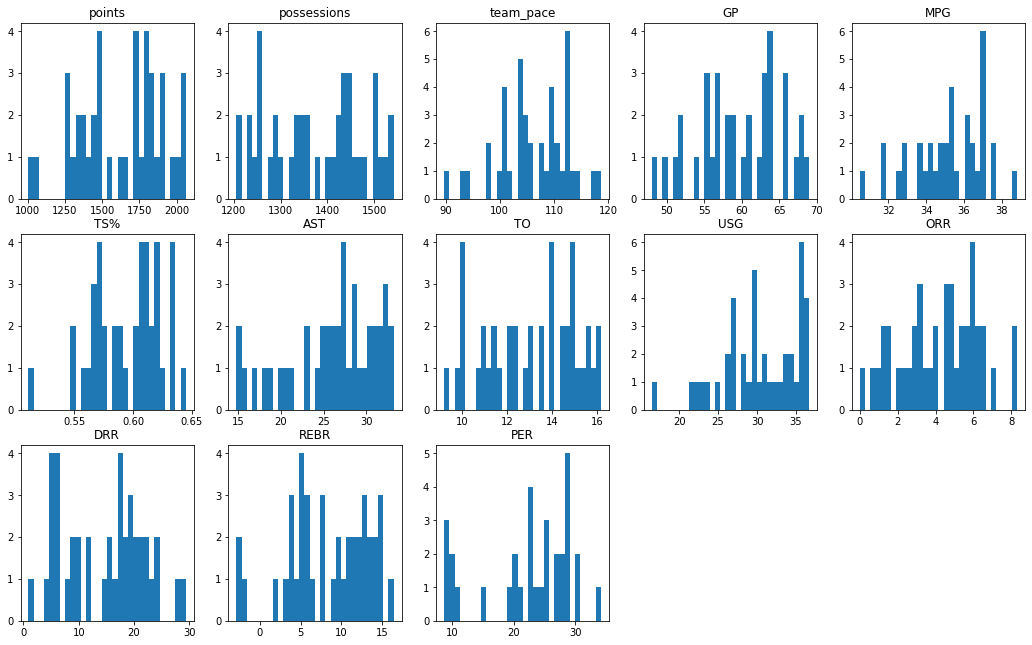

In [46]:
# Create a list of all column names, except for 'ID'
cols = list(player_df.iloc[:, 1:])

# Define the size for the plots and add padding around them
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)

#Loop over the columns in the DataFrame and create a ahistogram for eachone. 
for i in range(len(cols)): 
    plt.subplot(3, 5, i+1)
    plt.hist(player_df[cols[i]], bins=30)
    plt.title(cols[i])

Most of these histograms don't look normally distributed (the familiar bell curve). But it's tough to be certain by using only the human eye. You could try using fewer bins, but you might miss some important information in a lower-resolution histogram. Instead, try a different kind of visualization.

(array([1., 0., 1., 0., 1., 2., 0., 0., 1., 0., 3., 1., 3., 0., 2., 2., 0.,
        1., 2., 0., 1., 3., 4., 0., 0., 3., 0., 1., 2., 1.]),
 array([48. , 48.7, 49.4, 50.1, 50.8, 51.5, 52.2, 52.9, 53.6, 54.3, 55. ,
        55.7, 56.4, 57.1, 57.8, 58.5, 59.2, 59.9, 60.6, 61.3, 62. , 62.7,
        63.4, 64.1, 64.8, 65.5, 66.2, 66.9, 67.6, 68.3, 69. ]),
 <a list of 30 Patch objects>)

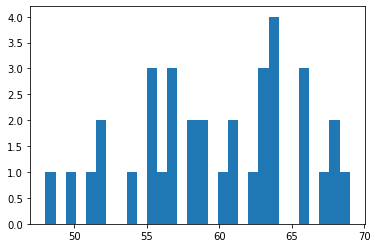

In [48]:
# Create a histogram for the 'GP' column. 
plt.hist(player_df['GP'], bins=30)

**Note!** 

A semicolon (<code>;</code>) at the end of the <code>hist()</code> function call will cause the output to show only the graph. The output won't show any additional textual information about the underlying data.

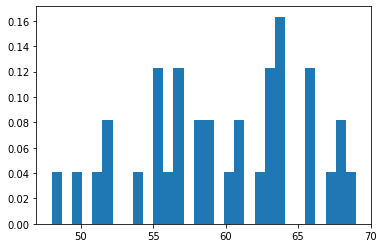

In [52]:
#Create a hustogram for the 'GP' column, this time as a probability density. 
plt.hist(player_df['GP'], density=True, bins=30);

### Create Kernel-Density estimates of the DataFrame Data

You don't have to use rectangles in the histogram. You could instead use triangles, trapezoids, or even tiny Gaussian bell curves. This latter shape is basically what the kernel-density estimate (KDE) does. It essentially creates a histogram of little bells curves. The area under the bell curves is 1.

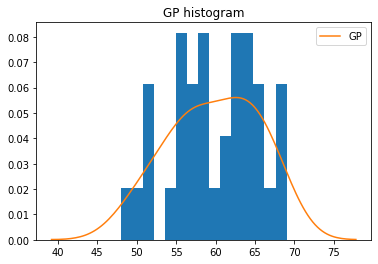

In [55]:
# Plot the KDE for 'GP' over the probability-density histogram
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

More clearly than the histogram, the KDE helps you see that GP's distribution is kind of bell-shaped, and it has a bulge on the right side.

Use a for loop to generate a matrix of KDEs for all of the columns:

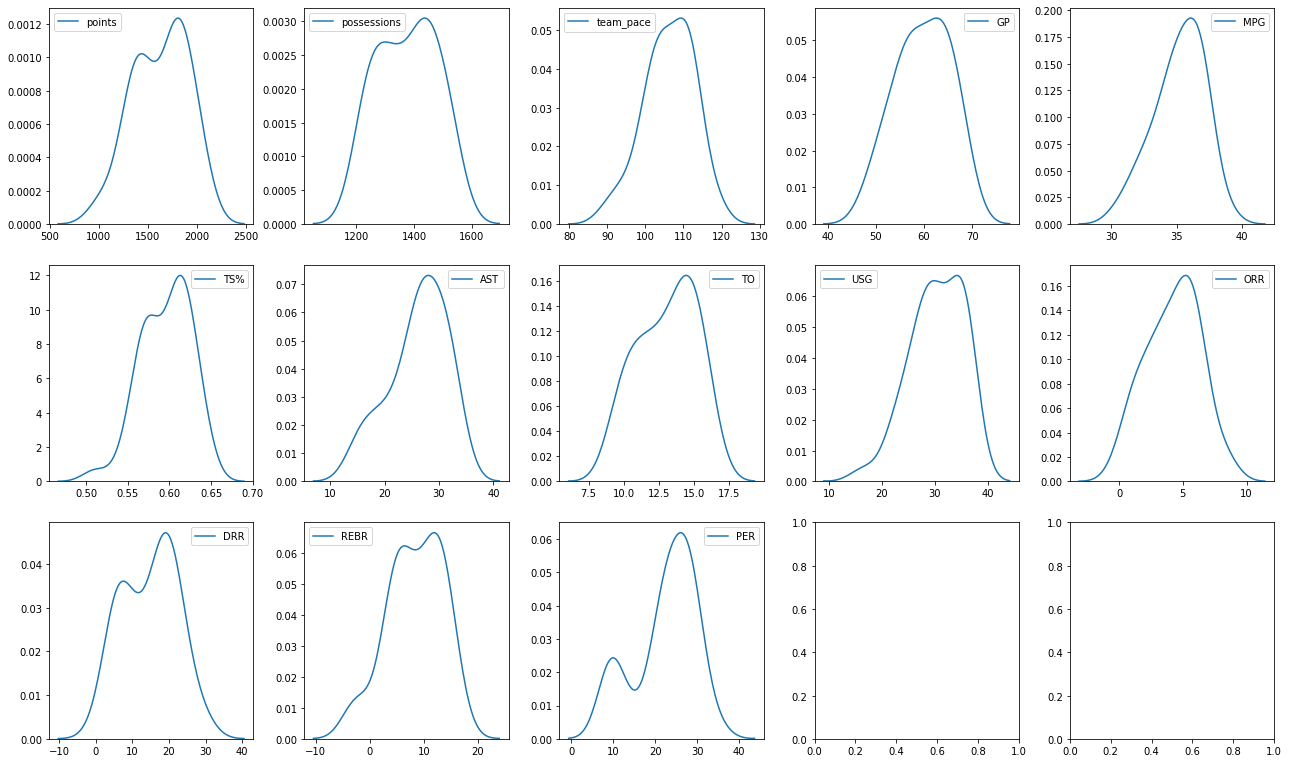

In [61]:
#Create a list of all column names, except for 'ID'.
cols = list(player_df.iloc[:, 1:])

#Create a 3x5 Matrix of subplots and add padding around them for readability. 
fig, axes = plt.subplots(3, 5, figsize=(18, 11))
fig.tight_layout(pad=2.0)

#Loop over the colummns of the DataFrame and create a KDE for each one. 
for i in range(len(cols)):
    sns.kdeplot(ax=axes[i//5, i%5], data=player_df[cols[i]])

Sure enough, many of these columns have KDEs that have two pronounced tops. Each top represents a mode of the data, or a value around which values in the dataset concentrate. The fact that so many of the columns are bimodal indicates that the dataset represents samples from two discrete populations.

## Data Exploration - Part 2

### Discover data that represents more than one population

Recognizing that data comes from different populations can be essential in data analysis for business. For example, imagine that you're analyzing occupancy data for a lodging-rental business. Vacation renters and business renters (such as individuals renting for a temporary business trip) could distribute themselves very differently for length of stay, time of year, or types of amenities required. Separating the two populations would be useful for purposes such as generating different marketing promotions for each population.

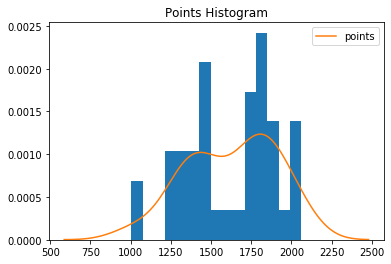

In [66]:
#plot the KDE for 'points' over the probability-density histogram
plt.hist(player_df['points'], density=True, bins=15)
plt.title('Points Histogram')
sns.kdeplot(player_df['points'])

In [68]:
player_df.loc[player_df['points'] >= 1600].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           23 non-null     int64  
 1   points       23 non-null     float64
 2   possessions  23 non-null     float64
 3   team_pace    23 non-null     float64
 4   GP           20 non-null     float64
 5   MPG          20 non-null     float64
 6   TS%          23 non-null     float64
 7   AST          23 non-null     float64
 8   TO           23 non-null     float64
 9   USG          23 non-null     float64
 10  ORR          23 non-null     float64
 11  DRR          23 non-null     float64
 12  REBR         23 non-null     float64
 13  PER          20 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.7 KB


Twenty-three rows include players who scored at least 1,600 points.

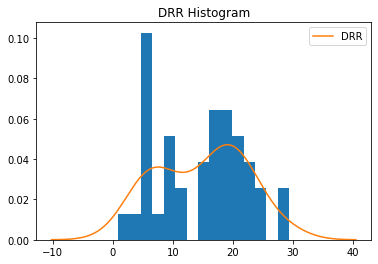

In [71]:
#Plot the KDE for 'DRR' over the probability-density histogram. 
plt.hist(player_df['DRR'], density=True, bins=15)
plt.title('DRR Histogram')
sns.kdeplot(player_df['DRR']);

At around 15 defensive rebounds, you see the distribution split. Check to see if that information helps narrow down the population that might be Tune Squad players.

Again, you could hypothesize that Tune Squad players are more likely to try to get the ball in a defensive rebound because of their special skills. So count how many players (rows) scored more than 1,600 points and have a DRR of more than 15:

In [74]:
player_df.loc[(player_df['points'] >= 1600) & (player_df['DRR'] >= 15)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 40
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           18 non-null     int64  
 1   points       18 non-null     float64
 2   possessions  18 non-null     float64
 3   team_pace    18 non-null     float64
 4   GP           15 non-null     float64
 5   MPG          16 non-null     float64
 6   TS%          18 non-null     float64
 7   AST          18 non-null     float64
 8   TO           18 non-null     float64
 9   USG          18 non-null     float64
 10  ORR          18 non-null     float64
 11  DRR          18 non-null     float64
 12  REBR         18 non-null     float64
 13  PER          16 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 2.1 KB


C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


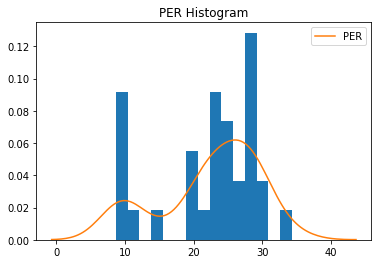

In [77]:
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER Histogram')
sns.kdeplot(player_df['PER']);

In [78]:
player_df.loc[(player_df['points'] >= 1600)& (player_df['DRR'] >= 15) & (player_df['PER'] >=17)]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
26,31,2049.0,1434.0,110.0,64.0,38.8,0.619,31.5,14.9,35.5,8.3,17.6,12.8,28.44
27,32,1795.0,1481.8,112.1,62.0,35.4,0.608,31.9,14.5,32.0,6.5,22.5,12.9,23.34
28,33,1805.0,1509.9,108.6,64.0,35.4,0.622,27.9,13.9,36.0,5.9,27.7,12.2,22.41
30,35,1963.0,1539.1,117.4,NaN,NaN,0.633,32.3,16.2,34.0,5.9,19.8,13.1,27.16
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40


You could reasonably expect these rows to represent the Tune Squad players. For the purposes of this module, the 15 Tune Squad players were in fact added to the very end of the dataset. If you didn't know that detail, though, you could reasonably assume the data was compiled from two different datasets, where the second dataset was added to the end of the first dataset.

The rows for player IDs 34 and 40 aren't a part of this set. Although index 34 and index 40 appear, the IDs 34 and 40 don't. You removed 40 earlier because the points in that row were only 183. Now look at player ID 34:

In [80]:
player_df.loc[player_df['ID'] ==34]

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
29,34,1743.0,1422.4,112.9,64.0,36.3,0.619,30.9,15.6,34.5,5.9,18.9,14.8,NaN


## Data Manipulation - Part 1

### Add Qualifying player information

You've identified the groups of players by examining the bimodal histograms. So now make a column to indicate whether a row represents a human or Tune Squad player. Then give each row a unique "name."

First, create the new column for the DataFrame. Create it by making a list of values for the column and then assigning the column a name.

In [89]:
# Initialize the list to house the player data.
pop_list = []

# If the ID number is 30 or less, it's a human player; otherwise, it's a Tune Squad player.
for id in player_df['ID']:
    if id <= 30:
        pop_list.append('player'+str(id))
    else:
        pop_list.append('tune_squad'+str(id%30))

pop_list

['player1',
 'player2',
 'player3',
 'player4',
 'player5',
 'player6',
 'player7',
 'player8',
 'player10',
 'player11',
 'player12',
 'player13',
 'player14',
 'player15',
 'player16',
 'player17',
 'player18',
 'player19',
 'player21',
 'player22',
 'player23',
 'player24',
 'player26',
 'player27',
 'player28',
 'player29',
 'tune_squad1',
 'tune_squad2',
 'tune_squad3',
 'tune_squad4',
 'tune_squad5',
 'tune_squad6',
 'tune_squad7',
 'tune_squad8',
 'tune_squad9',
 'tune_squad11',
 'tune_squad12',
 'tune_squad13',
 'tune_squad14',
 'tune_squad15',
 'tune_squad16']

In [90]:
#Assign this list as the values for the nuew plyaer column in the DataFrame. 
player_df['player'] = pop_list
player_df.head()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,player
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90,player1
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30,player2
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN,player3
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35,player4
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38,player5


Placing the new column last will cause problems later because the last column is the default location for new columns. So move the new column to the right of <code>ID</code>.

Because you have too many columns to easily type, create a list of all but the last column (now <code>player</code>). Use the <code>insert()</code> list method to move the column to the second position in the list. (Remember that Python uses zero-based indexing!)

Now use the altered list to specify the order of columns in the <code>player_df</code> DataFrame.

In [92]:
#Create list of all DataFrame column names but the last one. 
column_list = list(player_df.iloc[:, :-1])

# Make Playerthe second item in the list
column_list.insert(1, 'player')

#Reassign the columns in the player_df DataFrame in this new order. 
player_df = player_df[column_list]

#Verify that the columns are ordered the way you expect. 
player_df.head()

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,player2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,player3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,player4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,player5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


## Data Manipulation - Part 2

### Impute Missing Values for columns

In [95]:
#Recheck the totals for Nan values by row.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             6
MPG            5
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


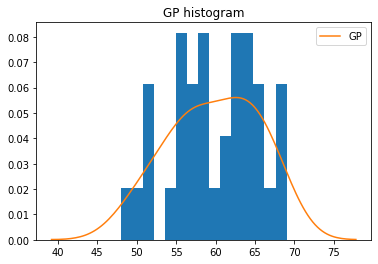

In [96]:
#Plot the KDE for 'GP' over the probability-densiy histogram
plt.hist(player_df['GP'], density=True, bins=15)
plt.title('GP histogram')
sns.kdeplot(player_df['GP']);

C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


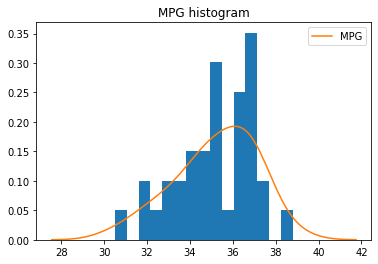

In [97]:
#Plot the KDE for 'MPG' over the probabilit-density histogram
plt.hist(player_df['MPG'], density=True, bins=15)
plt.title('MPG histogram')
sns.kdeplot(player_df['MPG']);

C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gerar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


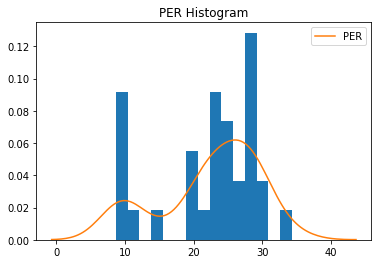

In [98]:
# Plot the KDE for 'PER' over the probability-density histogram. 
plt.hist(player_df['PER'], density=True, bins=15)
plt.title('PER Histogram')
sns.kdeplot(player_df['PER']);

### Impute missing values by using average values
To impute the missing values in the normally-enough distributed columns, use the <code>fillna()</code> DataFrame method. In the code, state that you're working with only three of the columns <code>(player_df[['GP','MPG']])</code>. Also state that you want to replace the <code>NaN</code> values in each of those columns with those columns' respective mean values: <code>fillna(value=player_df[['GP','MPG']].mean())</code>. (Once again, stringing together pandas methods makes your job much easier.)

In [102]:
#Replace the missing values in 'GP' and 'MPG' with the mean values of the respective columns. 
player_df[['GP', 'MPG']] = player_df[['GP', 'MPG']].fillna(value=player_df[['GP','MPG']].mean())

#Recheck the totals for Nan Values by Row to ensure that the expected missing values are filled in. 
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            9
dtype: int64

## Data Manipulation - Part 3

### Impute missing values by using machine learning

As player_df.isna().sum() confirmed in the previous unit, only nine missing values remain in PER. You can't use a simple average to impute values in that column. But little domain expertise can help.

PER is computed from the values of the nine columns that precede it in the DataFrame (GP through REBR). However, PER is a complicated statistic to compute (see details at basketball-reference.com ). So you'll do what data scientists do: build a model to give a good approximation!

It would be nice to build a simple linear regression model to estimate the missing PER values. However, as with any estimate, you have to ask yourself how accurate it is.

To get some sense of a model's accuracy, you could use machine learning to split your data into two subsets: test and training. The training subset is the portion of the data you use to train the model. You use the other subset to test the model. Commonly, 75 percent of the data is used to train the model, and 25 percent is used to test the model.

But what if you get unusually lucky or unlucky with your random split of test and training data? For example, what if you chose all human players to train the model, but then you tested the accuracy of the model on the Tune Squad players? This setup is unlikely to yield accurate results.

To avoid this problem, statisticians and data scientists use a technique called cross-validation. The idea is to iterate through the dataset, splitting the data in different ways between training data and test data. Using this technique multiple times should give you a reasonable idea of how the model will work with new data, even if you have only limited data to work with.

This image provides a visualization of the cross-validation process:

<img src = ' https://docs.microsoft.com/en-us/learn/modules/predict-basketball-player-efficiency-ratings/media/k-fold-cross-validation.png'>

Mean r2 score: 0.9995
10% of r2 scores are between 0.9985 and 0.9987
10% of r2 scores are between 0.9987 and 0.9988
10% of r2 scores are between 0.9995 and 0.9996
10% of r2 scores are between 0.9996 and 0.9997
60% of r2 scores are between 0.9997 and 0.9998


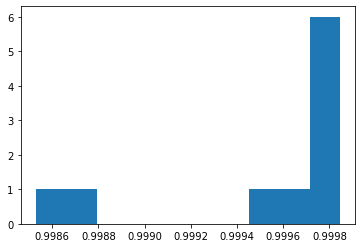

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define the variables for the regression model as those rows that have no missing values.
X = player_df.dropna(how='any').iloc[:, 5:-1].to_numpy()
y = player_df.dropna(how='any').iloc[:, -1]

# Define the regression model.
lin_reg = LinearRegression()

# Use the scikit-learn cross-validation function to fit this model 10 times and return the R2 scores.
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='r2')

# Define the histogram of the scores and copy out information from the histogram.
entries, bin_edges, patches = plt.hist(scores, bins=10);

# Print out the mean and the results from the histogram.
print('Mean r2 score: {:.4f}'.format(scores.mean()))
for i in range(len(entries)):
    if entries[i] > 0:
        print('{:.0f}% of r2 scores are between {:.4f} and {:.4f}'.format(entries[i]*100/len(entries), 
        bin_edges[i], 
        bin_edges[i+1]))

### Fit the regression model for the player data

In [109]:
#Fit the same regression model, this time using all of the available data. 
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Create a mask of rows that use missing values in the DataFrame

There isn't an elegant way for <code>fillna()</code> to use the results from your model to fill in the missing <code>PER</code> values. So you'll have to use a mask.

A mask in pandas is a Boolean map of values that fulfill a certain condition or set of conditions. To fill in just your remaining values, your mask should look like this:

In [113]:
# Create and display a mask of rows in the DataFrame. Rows should contain at least one NaN value.
mask = player_df.isnull().any(axis=1)
mask

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37     True
38    False
39    False
40    False
dtype: bool

In [114]:
# Apply the mask define earlier to show the contents of specific columns of rows that contain Nan Values. 
player_df.loc[mask].iloc[:, 5:-1]

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR
2,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8
7,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2
8,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9
11,59.771429,31.700000,0.584,32.4,14.7,16.5,3.2,19.0,4.1
15,59.771429,34.900000,0.603,26.2,11.1,36.7,3.0,14.3,5.3
20,61.000000,35.208333,0.645,20.6,13.1,31.5,4.0,12.0,5.2
24,48.000000,35.100000,0.569,19.0,10.9,29.2,4.6,17.7,5.2
29,64.000000,36.300000,0.619,30.9,15.6,34.5,5.9,18.9,14.8
37,64.000000,36.500000,0.618,31.3,14.0,34.9,5.9,21.3,14.5


### Use the mask and the fitted mask to impute the final missing valies in the DataFrame

A mask is useful here because it lets you use a view of the player_df DataFrame rather than a slice of it. When you defined X, you used player_df.dropna(how='any').iloc[:, 5:-1].to_numpy(). The dropna() method creates a new DataFrame object by default when it's called. (This feature is the reason you used the method's inplace parameter on the original DataFrame.) So any changes to values that you might make in the X DataFrame wouldn't change values in the player_df DataFrame.

Your mask is different. It simply enables you to work with a subset of the player_df DataFrame. So any changes you make to the DataFrame while you're applying the mask will also apply to the player_df DataFrame as a whole.

In [121]:
# Impute the missing values in 'PER' by using the regression model and mask.
player_df.loc[mask, 'PER'] = lin_reg.predict(player_df.loc[mask].iloc[:, 5:-1])

# Recheck the DataFrame for rows that have missing values.
player_df.isna().sum()

ID             0
player         0
points         0
possessions    0
team_pace      0
GP             0
MPG            0
TS%            0
AST            0
TO             0
USG            0
ORR            0
DRR            0
REBR           0
PER            0
dtype: int64

## Wrap up

In [122]:
# Display the entire DataFrame.
player_df

,ID,player,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,player1,1893.0,1251.8,97.8,63.000000,33.900000,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.900000
1,2,player2,1386.0,1282.5,110.5,58.000000,32.500000,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.300000
2,3,player3,1405.0,1252.3,105.8,55.000000,36.300000,0.605,25.7,13.9,28.1,4.5,4.9,1.8,16.595759
3,4,player4,1282.0,1235.9,100.7,54.000000,37.600000,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.350000
4,5,player5,1721.0,1254.0,105.7,59.000000,30.500000,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.380000
5,6,player6,1004.0,1322.4,102.1,57.000000,36.300000,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.830000
6,7,player7,1920.0,1207.6,109.8,55.000000,37.000000,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.710000
7,8,player8,1353.0,1348.1,112.2,57.000000,35.208333,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,8.717454
8,10,player10,1468.0,1400.9,93.7,61.000000,35.600000,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,3.115350
9,11,player11,1856.0,1303.8,93.4,55.000000,33.600000,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.670000


In [123]:
player_df.to_csv('player_data_final.csv', index=False)

The <code>index=False</code> parameter ensures that the index that was added to the DataFrame when pandas initially read the CSV file isn't written to the CSV file.